In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('wisc_bc_data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
x=df.drop(['id','diagnosis'],axis=1)
y=df['diagnosis']

In [4]:
x.shape

(569, 30)

### Normalize the data

In [5]:

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)

### Principal Component Analysis 

In [6]:
from sklearn.decomposition import PCA
pca=PCA()
x_pca=pca.fit_transform(x_scaled)

In [7]:
x_pca

array([[ 1.38702121e+00,  4.26895326e-01, -5.41702643e-01, ...,
        -4.32549684e-03,  6.22252173e-03, -7.89493087e-03],
       [ 4.62308252e-01, -5.56946737e-01, -2.05174584e-01, ...,
         4.21874852e-03, -4.08391804e-04, -3.18067200e-04],
       [ 9.54621472e-01, -1.09701150e-01, -1.47848400e-01, ...,
         5.06868456e-03,  9.53573946e-04,  1.17674556e-04],
       ...,
       [ 2.26311313e-01, -2.87945766e-01,  3.15224024e-01, ...,
        -2.32110439e-04,  1.01657932e-03,  6.30851735e-04],
       [ 1.67783369e+00,  3.35945955e-01,  2.96116006e-01, ...,
        -8.38037637e-03, -1.35651474e-02, -3.93064355e-03],
       [-9.05068041e-01, -1.04108746e-01,  3.82859921e-01, ...,
        -1.33298266e-04, -8.83068730e-03, -3.23670540e-03]])

In [8]:
var=pca.explained_variance_ratio_
var

array([5.30976894e-01, 1.72834896e-01, 7.11444201e-02, 6.41125883e-02,
       4.08607204e-02, 3.07149442e-02, 1.58083746e-02, 1.19147161e-02,
       9.88429103e-03, 9.45446106e-03, 8.49396551e-03, 7.57976457e-03,
       6.56638137e-03, 4.74811462e-03, 2.69423338e-03, 2.57754484e-03,
       1.83755588e-03, 1.51271660e-03, 1.37718463e-03, 1.05959242e-03,
       9.83061040e-04, 7.84496266e-04, 5.28060046e-04, 5.09986666e-04,
       4.30073326e-04, 3.29617326e-04, 1.90574049e-04, 5.59104265e-05,
       2.88966877e-05, 5.96453235e-06])

<BarContainer object of 30 artists>

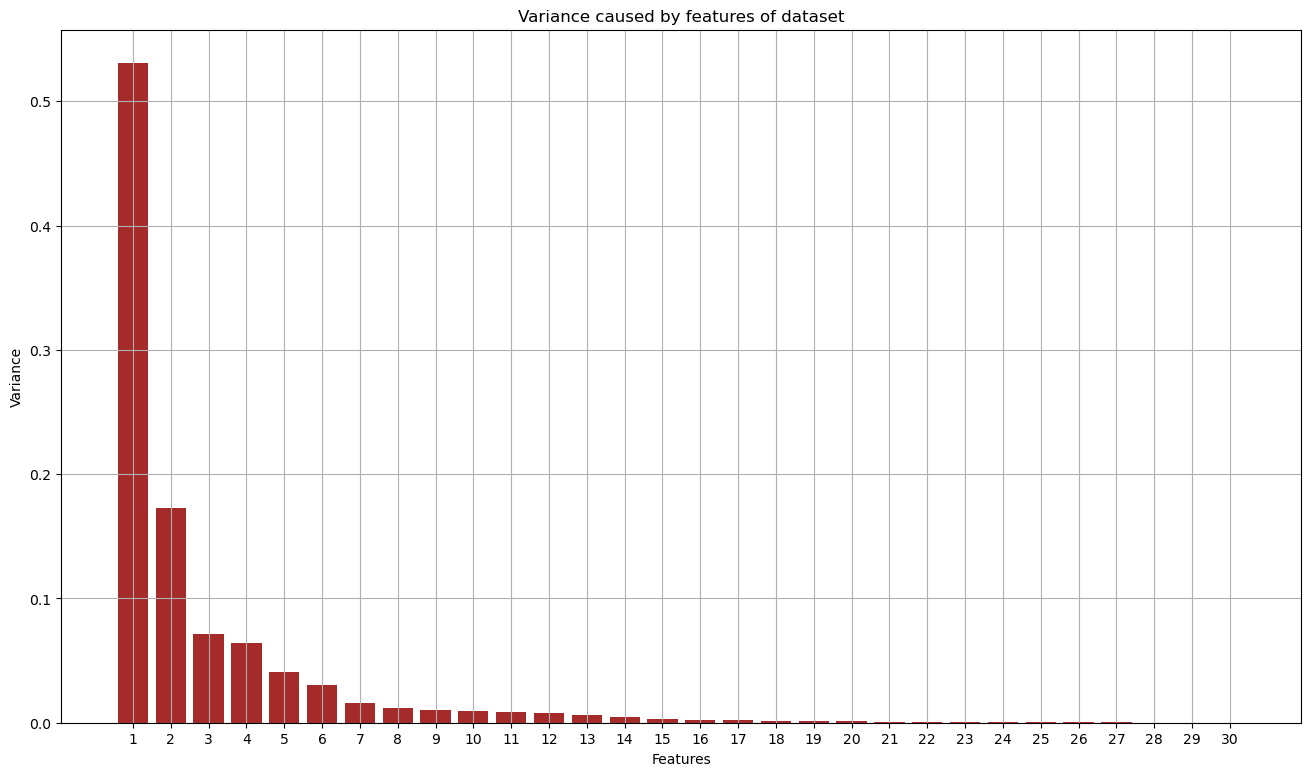

In [9]:
plt.figure(figsize=(16,9))
plt.title('Variance caused by features of dataset')
plt.xlabel('Features')
plt.ylabel('Variance')
plt.grid()
plt.xticks(range(1,31))
plt.bar(range(1,31),var,color='brown')

In [10]:
pca=PCA(n_components=3)
x_pca=pca.fit_transform(x_scaled)

In [11]:
x_pca.shape

(569, 3)

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,random_state=0)

### Build the model (SVM)

In [13]:
from sklearn.svm import SVC

In [14]:
classifier=SVC(random_state=0)

In [15]:
classifier.fit(x_train,y_train)

SVC(random_state=0)

### Performance Evaluation

In [16]:
y_pred=classifier.predict(x_test)
y_pred

array(['M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B',
       'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M'],
      dtype=object)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.972027972027972